In [145]:
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
excel_file = 'internet.xlsx' 

xls = pd.ExcelFile(excel_file)
x=0
for sheet_name in xls.sheet_names:
  x+=1
  df = pd.read_excel(excel_file, sheet_name=sheet_name)
  nombre_hoja = sheet_name
  nombrelimpio = nombre_hoja.replace(' ', '_').replace("-", "_").replace("%", "p")
  globals()[f'df_{nombrelimpio}'] = df  # Crea una variable global con el nombre de la hoja
  print(f'{x} df_{nombrelimpio}')

df_Acc_vel_loc_sinrangos
df_Velocidad_sin_Rangos
df_Accesos_tecnologia_localidad
df_Velocidad_p_por_prov
df_Totales_VMD
df_Totales_Accesos_Por_Tecnología
df_Accesos_Por_Tecnología
df_Penetración_poblacion
df_Penetracion_hogares
df_Penetracion_totales
df_Totales_Accesos_por_velocidad
df_Accesos_por_velocidad
df_Dial_BAf
df_Totales_Dial_BAf
df_Ingresos_


Como se puede notar se generaron 15 Dataframes, 1 por cada hoja del excel.

Columnas a descartar:  
2 velocidad_sin_rangos (no tiene el detalle de localidad)  
7 Accesos_Por_Tecnologia (se resume en Totales_Accesos_Por_Tecnologia)  
8 Penetracion_poblacion (se opta por representar penetracion_totales)  
9 Penetracion_hogares (se opta por representar penetracion_totales)  
11 Totales Accesos por velocidad (se extrae desde ACC_vel_sinrangos, solo tiene +30mbps)  
12 Accesos por velocidad (tiene solo +30mbps)  
13 Dial_BAF (Dial up es tecnologia antigua)  
14 Totales_Dial_BAF  


## Analisis del dataframe Acc_vel_loc_sinrangos

In [120]:
df_Acc_vel_loc_sinrangos.describe()

,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps","2,5 Mbps",...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
count,1030.000000,36.000000,642.000000,525.000000,284.000000,872.000000,15.000000,677.000000,1.0,4.000000,...,1.0,4.0,4.000000,1.0,1.0,17.000000,420.000000,2.0,1.0,2.000000
mean,318.614563,2.944444,42.978193,2.100952,39.588028,66.642202,132.533333,101.428360,18.0,156.500000,...,5.0,1.0,153.500000,1.0,110.0,3.352941,609.683333,1.0,1.0,5.000000
std,2964.939611,5.806127,985.466627,4.684645,118.563946,222.345674,291.222268,278.821468,NaN,212.528429,...,NaN,0.0,273.381906,NaN,NaN,5.700232,3431.387543,0.0,NaN,5.656854
min,-15.000000,1.000000,0.000000,1.000000,1.000000,0.000000,7.000000,1.000000,18.0,21.000000,...,5.0,1.0,1.000000,1.0,110.0,1.000000,1.000000,1.0,1.0,1.000000
25%,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,31.000000,4.000000,18.0,35.250000,...,5.0,1.0,10.750000,1.0,110.0,1.000000,17.000000,1.0,1.0,3.000000
50%,6.000000,1.000000,1.000000,1.000000,9.500000,10.000000,47.000000,21.000000,18.0,66.500000,...,5.0,1.0,25.000000,1.0,110.0,2.000000,139.500000,1.0,1.0,5.000000
75%,48.000000,2.000000,2.000000,1.000000,28.000000,40.250000,75.000000,77.000000,18.0,187.750000,...,5.0,1.0,167.750000,1.0,110.0,3.000000,498.000000,1.0,1.0,7.000000
max,87722.000000,31.000000,24968.000000,61.000000,1307.000000,4111.000000,1170.000000,3530.000000,18.0,472.000000,...,5.0,1.0,563.000000,1.0,110.0,25.000000,68405.000000,1.0,1.0,9.000000


In [121]:
for i, column in enumerate(df_Acc_vel_loc_sinrangos.columns):
  print(f"{i}: {column}")


0: Provincia
1: Partido
2: Localidad
3: Link Indec
4: Otros
5: 0,256 Mbps
6: 0,5 Mbps
7: 0,512 Mbps
8: 0,75 Mbps
9: 1 Mbps
10: 1,5 Mbps
11: 2 Mbps
12: 2,2 Mbps
13: 2,5 Mbps
14: 3 Mbps
15: 3,3 Mbps
16: 3,5 Mbps
17: 4 Mbps
18: 4,5 Mbps
19: 5 Mbps
20: 6 Mbps
21: 6,4 Mbps
22: 7 Mbps
23: 7,5 Mbps
24: 8 Mbps
25: 9 Mbps
26: 10 Mbps
27: 10,1 Mbps
28: 10,2 Mbps
29: 11 Mbps
30: 12 Mbps
31: 12,3 Mbps
32: 13 Mbps
33: 14 Mbps
34: 15 Mbps
35: 16 Mbps
36: 17 Mbps
37: 18 Mbps
38: 20 Mbps
39: 20,5 Mbps
40: 21 Mbps
41: 22 Mbps
42: 23 Mbps
43: 24 Mbps
44: 25 Mbps
45: 25,1 Mbps
46: 25,5 Mbps
47: 26 Mbps
48: 27 Mbps
49: 30 Mbps
50: 31 Mbps
51: 32 Mbps
52: 35 Mbps
53: 36 Mbps
54: 40 Mbps
55: 41 Mbps
56: 45 Mbps
57: 48 Mbps
58: 49 Mbps
59: 50 Mbps
60: 50,1 Mbps
61: 50,25 Mbps
62: 51 Mbps
63: 55 Mbps
64: 59 Mbps
65: 60 Mbps
66: 61 Mbps
67: 65 Mbps
68: 66 Mbps
69: 70 Mbps
70: 75 Mbps
71: 80 Mbps
72: 85 Mbps
73: 90 Mbps
74: 95 Mbps
75: 98 Mbps
76: 100 Mbps
77: 100,1 Mbps
78: 100,25 Mbps
79: 105 Mbps
80: 110 Mbp

El dataframe contiene 125 columnas, se decide agrupar en las velocides: hasta_100mbps, 100_a_300Mbps , 300_a_500mbps, mas_de_500mbps 

In [ ]:
#defino las columnas
# h_100 = [5,77]
# d100_a_300 = [77,103]
# d300_a_500 = [103,111]
# mas_500 = [111,124]

### Tratamiento de NANs

Para el caso de la suma entre columnas, la funcion considera los NAN como ceros, por lo que no es necesario un tratamiento particular para estos NANs.

In [129]:
#sumo las columnas
df_Acc_vel_loc_sinrangos['hasta_100mbps'] = df_Acc_vel_loc_sinrangos.iloc[:, 5:77].sum(axis=1)
df_Acc_vel_loc_sinrangos['de_100_a_300mbps'] = df_Acc_vel_loc_sinrangos.iloc[:, 77:103].sum(axis=1)
df_Acc_vel_loc_sinrangos['de_300_a_500mbps'] = df_Acc_vel_loc_sinrangos.iloc[:, 103:111].sum(axis=1)
df_Acc_vel_loc_sinrangos['mas_de_500mbps'] = df_Acc_vel_loc_sinrangos.iloc[:, 111:125].sum(axis=1)

In [130]:
for i, column in enumerate(df_Acc_vel_loc_sinrangos.columns):
  print(f"{i}: {column}")

0: Provincia
1: Partido
2: Localidad
3: Link Indec
4: Otros
5: 0,256 Mbps
6: 0,5 Mbps
7: 0,512 Mbps
8: 0,75 Mbps
9: 1 Mbps
10: 1,5 Mbps
11: 2 Mbps
12: 2,2 Mbps
13: 2,5 Mbps
14: 3 Mbps
15: 3,3 Mbps
16: 3,5 Mbps
17: 4 Mbps
18: 4,5 Mbps
19: 5 Mbps
20: 6 Mbps
21: 6,4 Mbps
22: 7 Mbps
23: 7,5 Mbps
24: 8 Mbps
25: 9 Mbps
26: 10 Mbps
27: 10,1 Mbps
28: 10,2 Mbps
29: 11 Mbps
30: 12 Mbps
31: 12,3 Mbps
32: 13 Mbps
33: 14 Mbps
34: 15 Mbps
35: 16 Mbps
36: 17 Mbps
37: 18 Mbps
38: 20 Mbps
39: 20,5 Mbps
40: 21 Mbps
41: 22 Mbps
42: 23 Mbps
43: 24 Mbps
44: 25 Mbps
45: 25,1 Mbps
46: 25,5 Mbps
47: 26 Mbps
48: 27 Mbps
49: 30 Mbps
50: 31 Mbps
51: 32 Mbps
52: 35 Mbps
53: 36 Mbps
54: 40 Mbps
55: 41 Mbps
56: 45 Mbps
57: 48 Mbps
58: 49 Mbps
59: 50 Mbps
60: 50,1 Mbps
61: 50,25 Mbps
62: 51 Mbps
63: 55 Mbps
64: 59 Mbps
65: 60 Mbps
66: 61 Mbps
67: 65 Mbps
68: 66 Mbps
69: 70 Mbps
70: 75 Mbps
71: 80 Mbps
72: 85 Mbps
73: 90 Mbps
74: 95 Mbps
75: 98 Mbps
76: 100 Mbps
77: 100,1 Mbps
78: 100,25 Mbps
79: 105 Mbps
80: 110 Mbp

### NANs columna Otros, reemplazo por cero

In [136]:
df_Acc_vel_loc_sinrangos['Otros'] = df_Acc_vel_loc_sinrangos['Otros'].fillna(0)


Me quedo con las ultimas 4 columnas nuevas

In [131]:
df_Acc_vel_loc_sinrangos = df_Acc_vel_loc_sinrangos.drop(df_Acc_vel_loc_sinrangos.columns[5:125], axis=1)

In [139]:
for i, column in enumerate(df_Acc_vel_loc_sinrangos.columns):
  print(f"{i}: {column}")

0: Provincia
1: Partido
2: Localidad
3: Link Indec
4: Otros
5: hasta_100mbps
6: de_100_a_300mbps
7: de_300_a_500mbps
8: mas_de_500mbps


In [ ]:
df_Acc_vel_sinrangos = df_Acc_vel_sinrangos.drop('Otros', axis=1)

### Generacion del archivo por separado

In [138]:
df_Acc_vel_loc_sinrangos.to_excel("Acc_vel_sinrangos.xlsx")

Preparo para graficar, agrupo por columnas:

In [141]:
dfp = df_Acc_vel_loc_sinrangos.drop(['Otros', 'Localidad', 'Partido', 'Link Indec'], axis=1)

In [142]:
#Agrupo por provincia para graficar
grouped_df = dfp.groupby('Provincia')
grouped_df.sum()

,hasta_100mbps,de_100_a_300mbps,de_300_a_500mbps,mas_de_500mbps
Provincia,,,,
BUENOS AIRES,3042846.0,1555781.0,150677.0,170106.0
CABA,644124.0,705338.0,86445.0,68804.0
CATAMARCA,65496.0,8141.0,372.0,854.0
CHACO,124191.0,25097.0,1610.0,829.0
CHUBUT,153841.0,159.0,3.0,33.0
CORDOBA,829681.0,210618.0,18929.0,8261.0
CORRIENTES,119238.0,30296.0,1851.0,267.0
ENTRE RIOS,223804.0,54522.0,3543.0,708.0
FORMOSA,50622.0,11104.0,581.0,109.0


<Axes: title={'center': 'Suma de conexiones principales Provincias'}, xlabel='Provincia'>

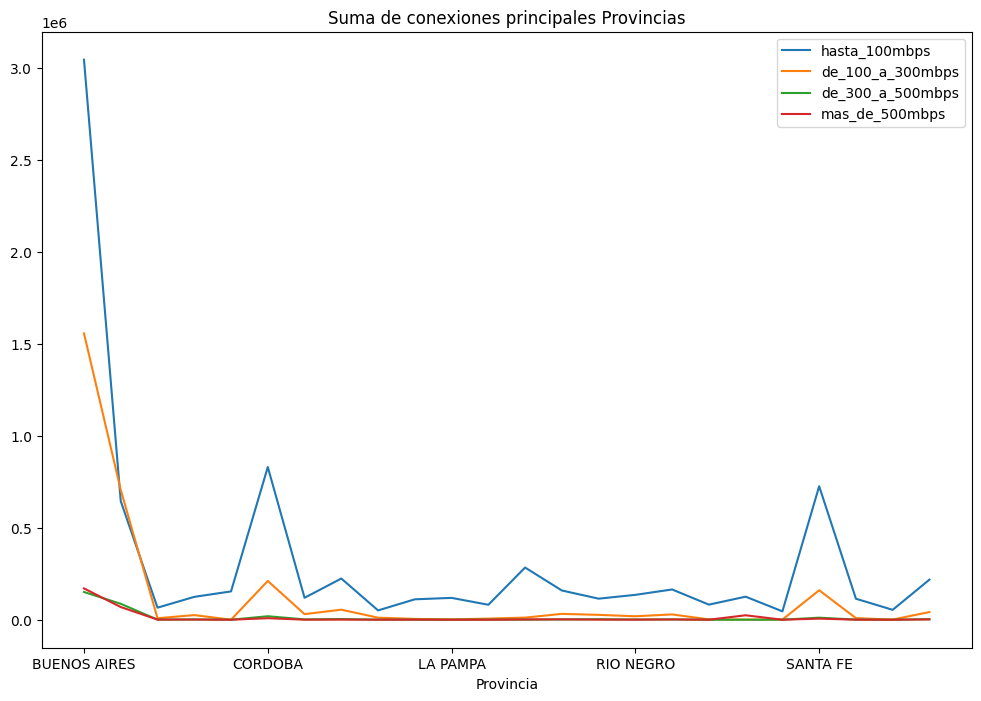

In [144]:
#grafico el detalle por provincia
grouped_df.sum().plot(figsize=(12,8), title= "Suma de conexiones principales Provincias")

Se puede observar en lineas generales una preponderancia por la conectividad por velocidades de hasta 100Mbps seguida por de 100 a 300Mbps y una clara acumulacion de conexiones desde Buenos Aires 

## Ponderacion por provincias

In [148]:
provincias = grouped_df.sum()

<Axes: ylabel='mas_de_500mbps'>

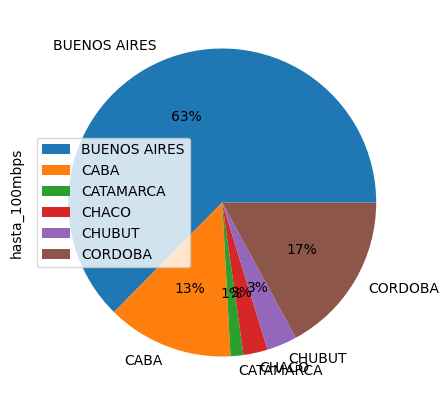

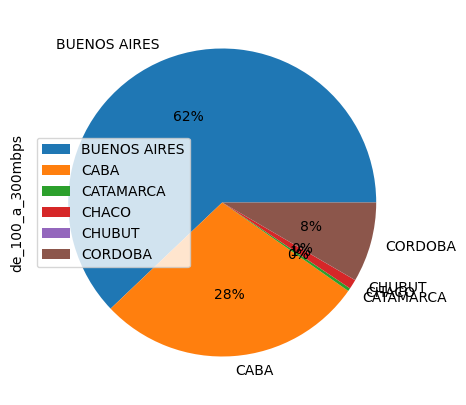

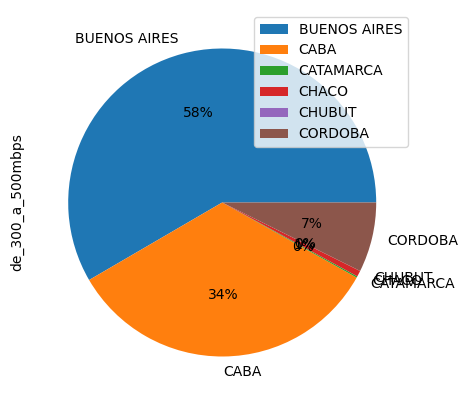

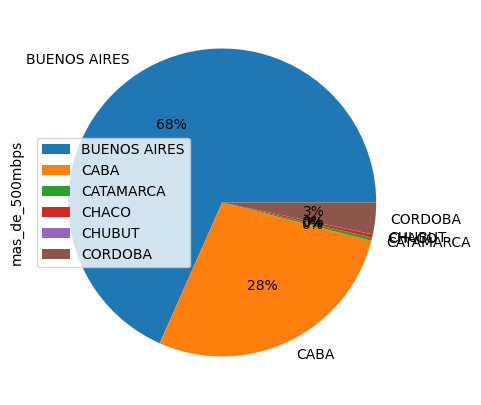

In [153]:
provincias[0:6].plot(kind='pie', y= 'hasta_100mbps', figsize=(5,5),autopct='%.0f%%')
provincias[0:6].plot(kind='pie', y= 'de_100_a_300mbps', figsize=(5,5),autopct='%.0f%%')
provincias[0:6].plot(kind='pie', y= 'de_300_a_500mbps', figsize=(5,5),autopct='%.0f%%')
provincias[0:6].plot(kind='pie', y= 'mas_de_500mbps', figsize=(5,5),autopct='%.0f%%')

Se puede notar una importante predominancia de conexiones desde Buenos Aires y CABA

## Analisis del dataframe Accesos_tecnologia_localidad :

In [154]:
df_Accesos_tecnologia_localidad

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3348,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3349,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3350,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
